In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,20)

In [17]:
highLumi_data = pd.read_hdf('data_highLumi_pt_250_500.h5')
lowLumi_data = pd.read_hdf('data_lowLumi_pt_250_500.h5')

highLumi_data.head()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,491.273762,0.885859,-1.607844,58.540714,0.027848,0.000236,10.916629,0.002658,0.723524,0.576035,0.451149,0.796152,0.783197,0.105238
1,443.077741,-0.850850,-1.808610,109.261432,0.111414,0.003361,2.430250,0.003674,1.081477,0.488437,0.431396,0.451639,0.883217,0.254729
2,487.700656,-0.848095,3.101697,80.398065,0.059299,0.000973,4.666474,0.004545,0.885087,0.637212,0.476032,0.719942,0.747054,0.231983
3,474.234962,1.501633,-1.656456,90.085535,0.061264,0.001368,5.948416,0.001163,1.354343,0.698983,0.668163,0.516104,0.955908,0.096045
4,485.597724,1.021424,1.742641,119.889999,0.133209,0.003223,1.363644,0.001526,0.905440,0.354629,0.219775,0.391665,0.619733,0.406962


In [13]:
hf_higgs= h5py.File('higgs_100000_pt_250_500.h5', 'r')
hf_qcd = h5py.File('qcd_100000_pt_250_500.h5', 'r')

with h5py.File('qcd_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

with h5py.File('higgs_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

qcd_100000_pt_250_500
higgs_100000_pt_250_500


In [14]:
higgs_data = np.array(hf_higgs.get('higgs_100000_pt_250_500'))
qcd_background_data = np.array(hf_qcd.get('qcd_100000_pt_250_500'))

In [15]:
higgs_data_1 = pd.DataFrame(data=higgs_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
qcd_background_data_1 = pd.DataFrame(data=qcd_background_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])

higgs_data = higgs_data_1
qcd_background_data = qcd_background_data_1

In [18]:
higgs_data.head()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118


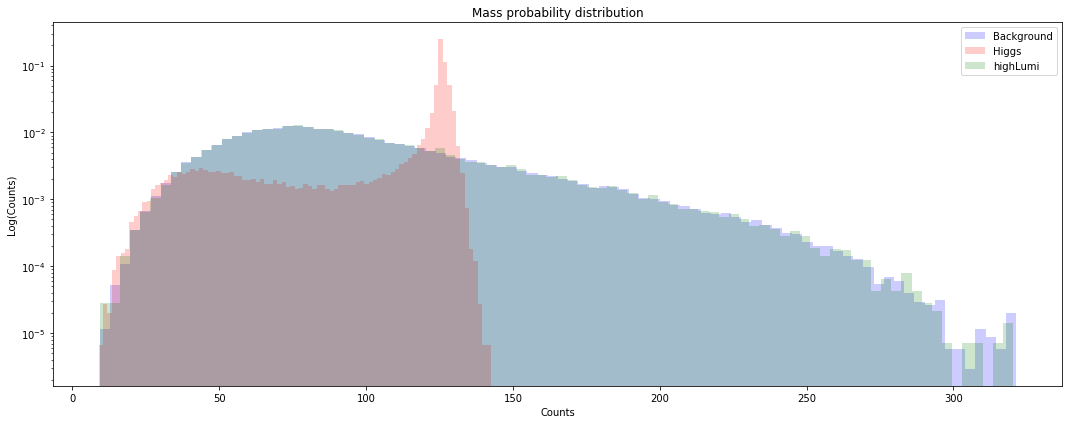

In [42]:
bins = 90; alph = .2 
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_data['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.hist(highLumi_data['mass'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
fig.tight_layout()

So based on Lab 7, it looks like the highLumi data is very similar to the background distribution. Although it is not scaled yet, It seems that a lot of our observed data is background. There is a tiny sliver of green that can be seen around 124 counts. Let's see if we can make cuts to see if that little sliver is actually a signal. 

In [43]:
# Showing that there is a difference within the lengths of the Lumi_data compared to the higgs_data

print("The overall size of the highLumi data is: " + str(len(highLumi_data)))
print("The overall size of the lowLumi data is: " + str(len(lowLumi_data)))
print("The overall size of the qcd and higgs data is: " + str(len(higgs_data)))

The overall size of the highLumi data is: 40344
The overall size of the lowLumi data is: 4060
The overall size of the qcd and higgs data is: 100000


The probability that a signal will be falsely recorded as a background: 1.0
Sigma value for the above percentage is: -inf


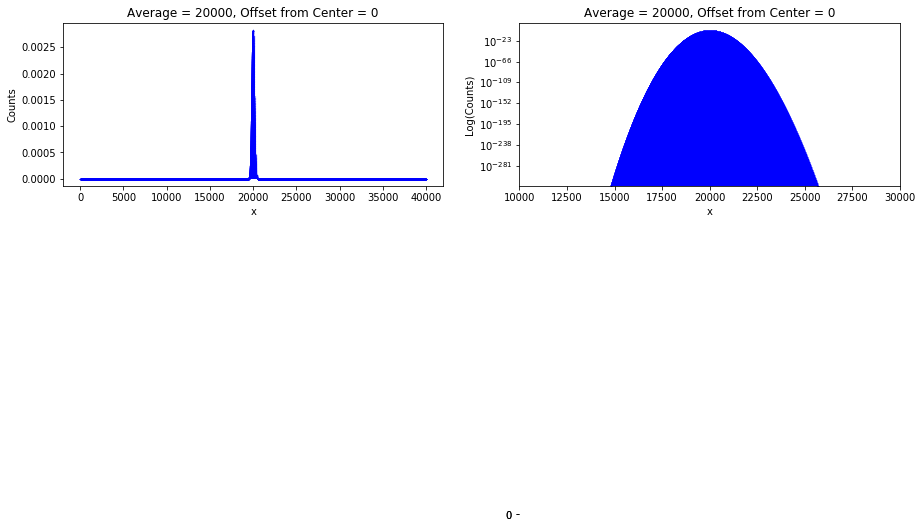

In [23]:
mu = 20000; sigma = 0; siz = 100000
distro = stats.poisson.rvs(mu, sigma, size = siz)
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15,3))
                          
ax.set_title(f'Average = {mu}, Offset from Center = {sigma}') 
x = np.linspace(0, 2*mu, 2*mu+1)
ax.plot(x,stats.poisson.pmf(x,mu,sigma), 'b.', ms=.5, alpha = .5)
ax.vlines(x, 0, stats.poisson.pmf(x, mu, sigma), colors='b', lw=.2, alpha=0.5)
measured = np.linspace(0, 100, 101)
ax.fill_between(measured, stats.poisson.pmf(measured, mu, sigma), color = 'r', linewidth = 1, alpha = .4)
ax.set_xlabel('x')
ax.set_ylabel('Counts')

ax1.set_title(f'Average = {mu}, Offset from Center = {sigma}') 
x1 = np.linspace(0, 2*mu, 2*mu+1)
ax1.plot(x1, stats.poisson.pmf(x1,mu,sigma), 'b.', ms=.5, alpha = .5)
ax1.vlines(x1, 0, stats.poisson.pmf(x1, mu, sigma), colors='b', lw=.2, alpha=0.5)
measured1 = np.linspace(0, 100, 101)
ax1.fill_between(measured1, stats.poisson.pmf(measured1, mu, sigma), color = 'r', linewidth = 1, alpha = .4)
ax1.set_xlabel('x')
ax1.set_xlim([10000, 30000])
ax1.set_ylabel('Log(Counts)')
ax1.set_yscale('log')

prob = 1 - stats.poisson.cdf(100, mu, sigma)
z = (stats.norm.ppf(1-(prob)))

print(f'The probability that a signal will be falsely recorded as a background: {prob}')
print(f'Sigma value for the above percentage is: {z}')

In [ ]:
qcd_background_mass_cut = qcd_background_data.query(f' 20 < mass < 130')
higgs_data_mass_cut = higgs_data.query(f' 20 < mass < 130')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')